In [1]:
import importlib
import numpy as np
import kRR_modified
# importlib.reload(kRR_modified)
from kRR_modified import KernelRidge

TypeError: __init__() got an unexpected keyword argument 'alpha'

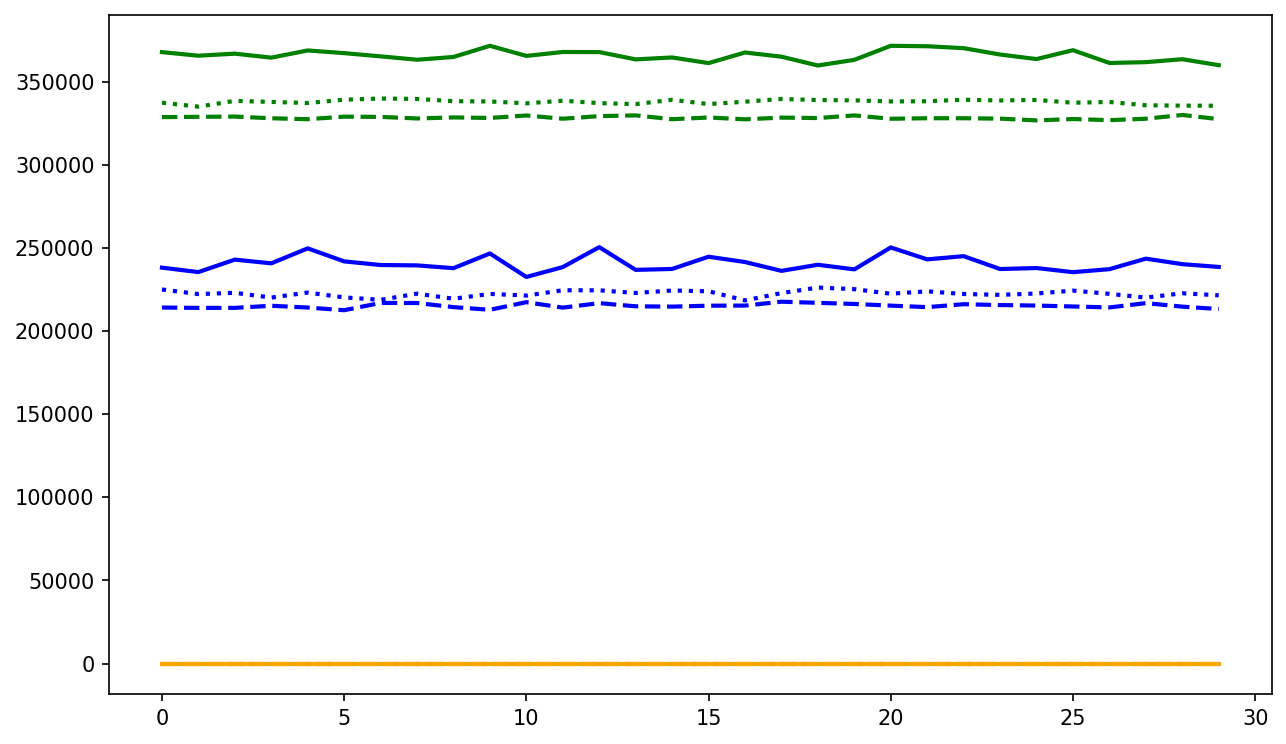

In [55]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

n = 30#times
data = 1000
norm1 = np.zeros([3,n])
norm2 = np.zeros([3,n])
norm3 = np.zeros([3,n])
scaler = StandardScaler()

def random_generate(k):
    if k == 0:
        x_data = np.random.random((data, 100))
        y_label = np.random.random(data)
    elif k == 1:
        x_data = np.random.gamma(2,2,(data, 100))
        y_label = np.random.gamma(1,2,data)
    elif k == 2:
        x_data = np.random.normal(0,1,(data, 100))
        y_label = np.random.normal(0,1,data)
    x_data = scaler.fit_transform(x_data)

    return x_data, y_label

for i in range(0,n):
    KRR = KernelRidge('quadratic')
    for line in range(0,3):
        x_data,y_label = random_generate(line)#sim) #random.randint(0,2))
        Kernel = KRR.compute_kernel_matrix(x_data, x_data)
    #np.linalg.matrix_rank(Kernel)
        K1 = 100
        K2 = 500
        K3 = 1000
        C1 = Kernel[:, :K1]
        W1 = C1[:K1, :]
        K1_approx = np.matmul(np.matmul(C1, np.linalg.pinv(W1)), C1.T)
        norm1[line][i] = np.linalg.norm(Kernel - K1_approx)
        C2 = Kernel[:, :K2]
        W2 = C2[:K2, :]
        K2_approx = np.matmul(np.matmul(C2, np.linalg.pinv(W2)), C2.T)
        norm2[line][i] = np.linalg.norm(Kernel - K2_approx)
        C3 = Kernel[:, :K3]
        W3 = C3[:K3, :]
        K3_approx = np.matmul(np.matmul(C3, np.linalg.pinv(W3)), C3.T)
        norm3[line][i] = np.linalg.norm(Kernel - K3_approx)
    



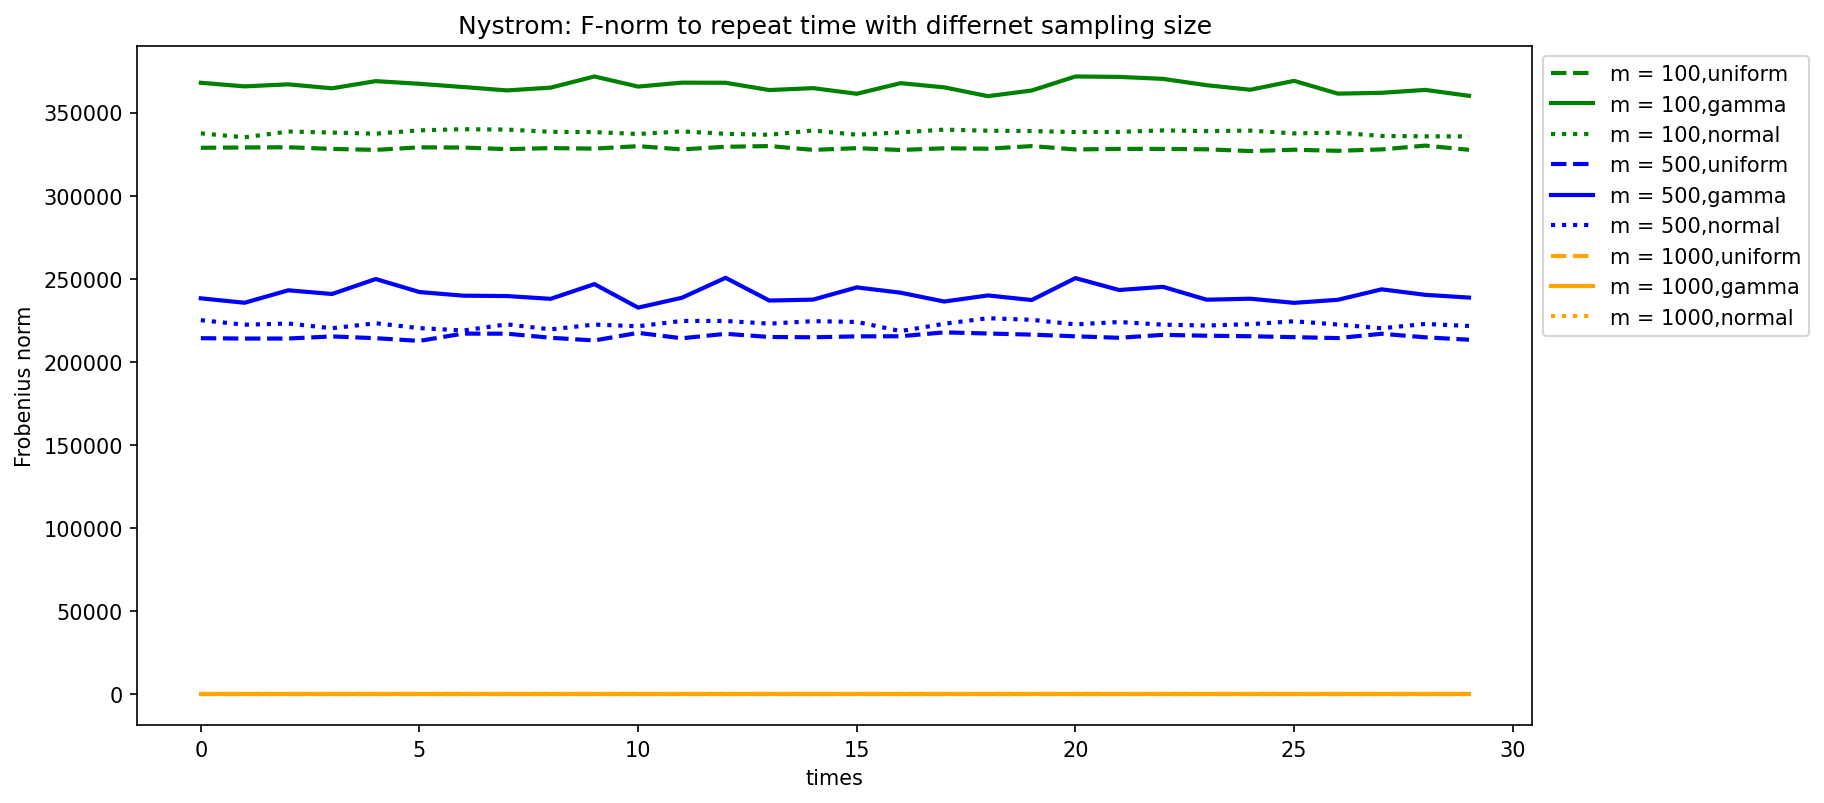

In [62]:
fig = plt.figure(figsize = (12,6),dpi=150)
plt.plot(norm1[0],label = 'm = 100,uniform',lw = 2,c = 'green', ls = '--')
plt.plot(norm1[1],label = 'm = 100,gamma',lw = 2,c = 'green', ls = '-')
plt.plot(norm1[2],label = 'm = 100,normal',lw = 2,c = 'green', ls = ':')
plt.plot(norm2[0],label = 'm = 500,uniform',lw = 2,c = 'blue', ls = '--')
plt.plot(norm2[1],label = 'm = 500,gamma',lw = 2,c = 'blue', ls = '-')
plt.plot(norm2[2],label = 'm = 500,normal',lw = 2,c = 'blue', ls = ':')
plt.plot(norm3[0],label = 'm = 1000,uniform',lw = 2,c = 'orange', ls = '--')
plt.plot(norm3[1],label = 'm = 1000,gamma',lw = 2,c = 'orange', ls = '-')
plt.plot(norm3[2],label = 'm = 1000,normal',lw = 2,c = 'orange', ls = ':')
plt.legend(loc = 2,bbox_to_anchor = (1,1),ncol = 1)
plt.title('Nystrom: F-norm to repeat time with differnet sampling size')
plt.xlabel('times')
plt.ylabel('Frobenius norm')
plt.show()
fig.savefig('nystrom_qua_fig1.png')

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
data = 1000

KRR = KernelRidge('gaussian')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
np.linalg.matrix_rank(Kernel)
norm_gauss =[]
x = range(50,data+1,10)
for i in range(50,data+1,10):
    K = i
    C = Kernel[:, :K]
    W = C[:K, :]
    K_approx = np.matmul(np.matmul(C, np.linalg.pinv(W)), C.T)
    norm_gauss.append(np.linalg.norm(Kernel - K_approx))




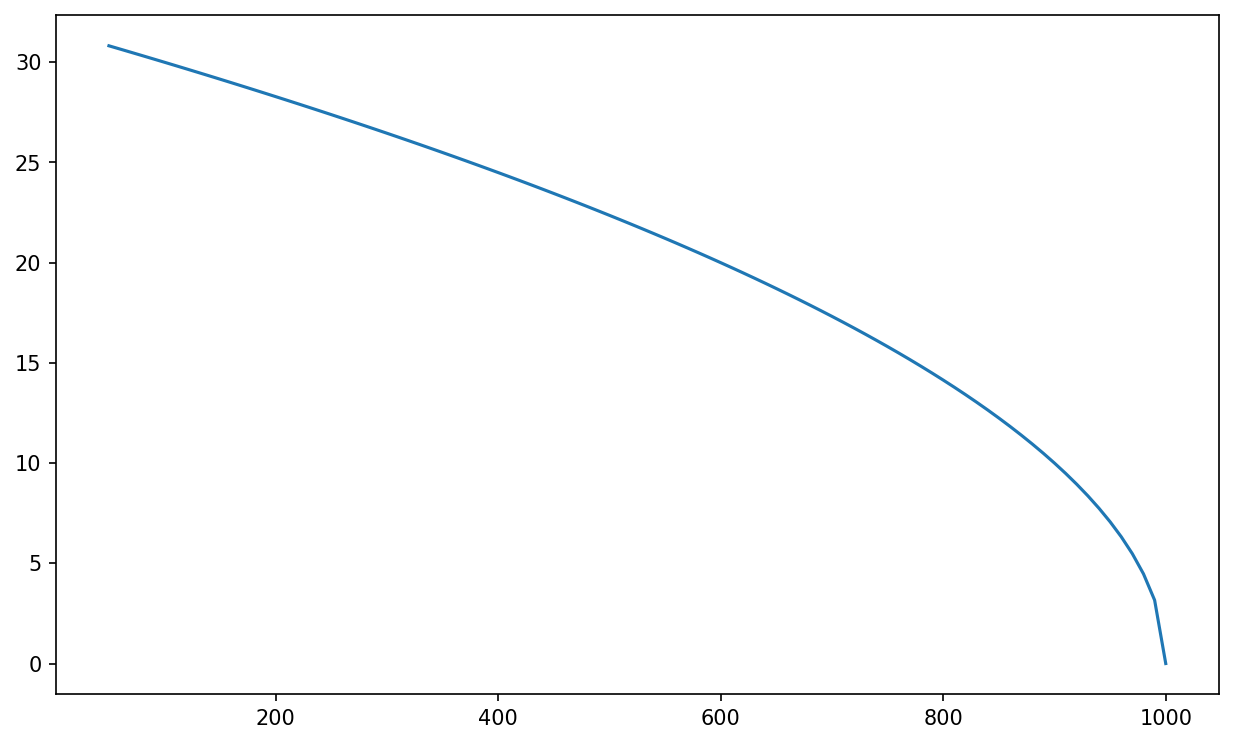

In [35]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_gauss)
plt.show()

In [56]:


KRR = KernelRidge('linear')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
print(np.linalg.matrix_rank(Kernel))


100


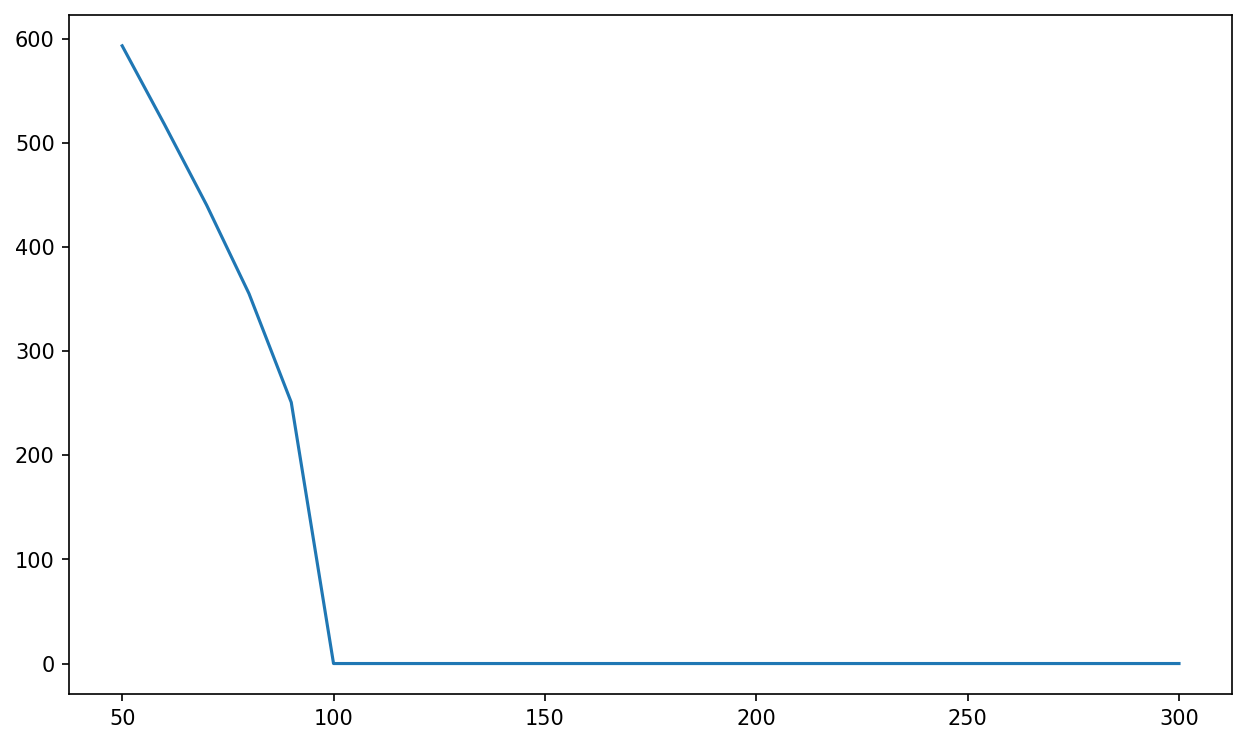

In [57]:
x2 = range(50,data-700+1,10)# np.linspace(50,data-800+1,10)
norm_lin = []
for i in range(50,data-700+1,10):
    K = i
    C = Kernel[:, :K]
    W = C[:K, :]
    K_approx = np.matmul(np.matmul(C, np.linalg.pinv(W)), C.T)
    norm_lin.append(np.linalg.norm(Kernel - K_approx))
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x2,norm_lin)
plt.show()

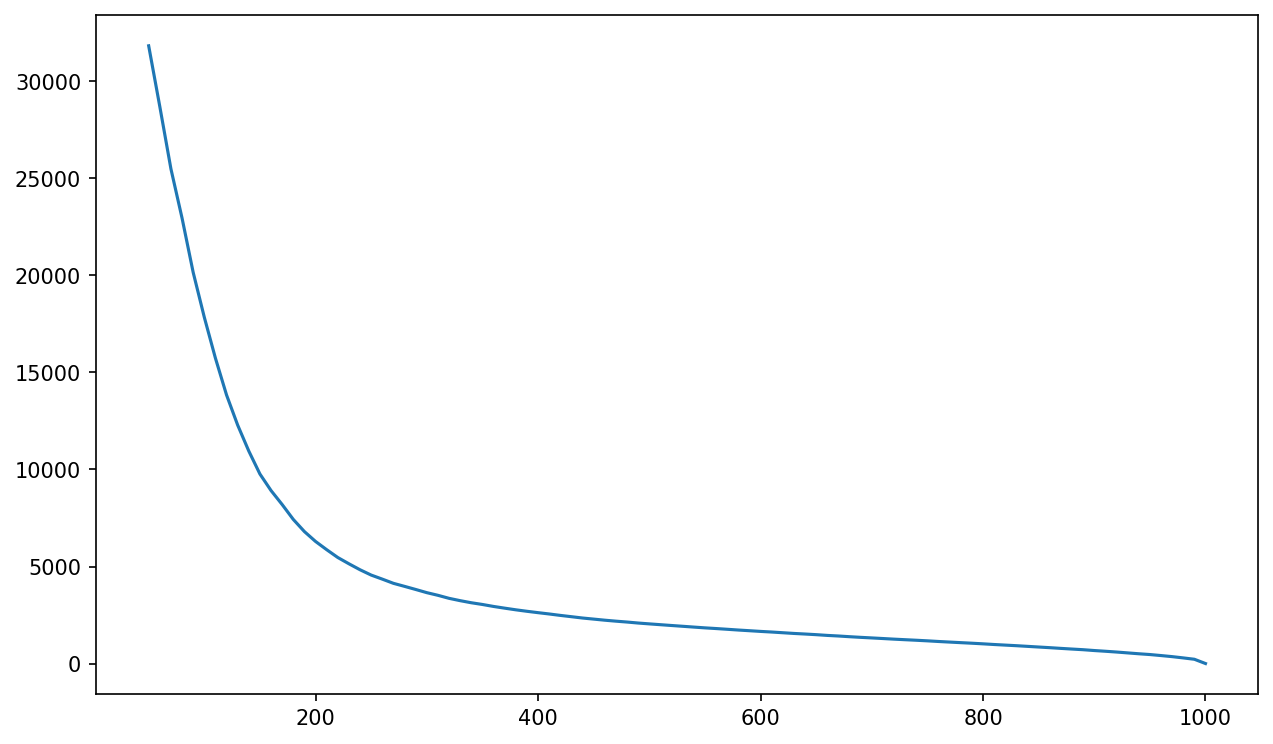

In [58]:
KRR = KernelRidge('quadratic')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)

norm_qua =[]
x = np.arange(50,data+1,10)
for i in range(50,data+1,10):
    K = i
    C = Kernel[:, :K]
    W = C[:K, :]
    K_approx = np.matmul(np.matmul(C, np.linalg.pinv(W)), C.T)
    norm_qua.append(np.linalg.norm(Kernel - K_approx))
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_qua)
plt.show()

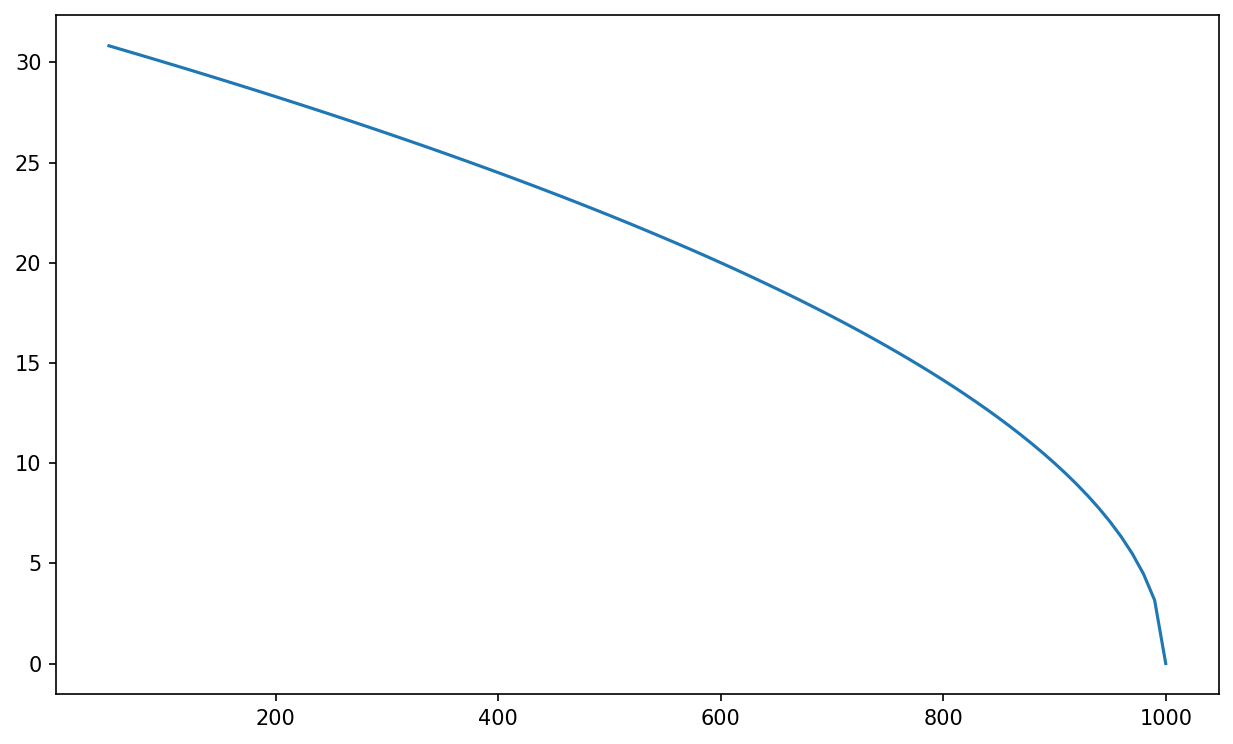

In [43]:
KRR = KernelRidge('laplacian')
x_data = np.random.random((data, 100))
y_label = np.random.random(data)
Kernel = KRR.compute_kernel_matrix(x_data, x_data)
np.linalg.matrix_rank(Kernel)
norm_lap =[]

x = np.arange(50,data+1,10)
for i in range(50,data+1,10):
    K = i
    C = Kernel[:, :K]
    W = C[:K, :]
    K_approx = np.matmul(np.matmul(C, np.linalg.pinv(W)), C.T)
    norm_lap.append(np.linalg.norm(Kernel - K_approx))
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_lap)
plt.show()

In [ ]:
fig = plt.figure(figsize = (10,6),dpi=150)
print(x,norm_lin,norm_guass,norm_qua)
plt.plot(x,np.log(norm_lin),label = 'Linear')
plt.plot(x,np.log(norm_gauss),label = 'Gaussian')
plt.plot(x,np.log(norm_qua),label = 'Quadratic')
plt.legend()
plt.xlabel('pick m column')
plt.ylabel('Log Frobenius norm')
plt.show()

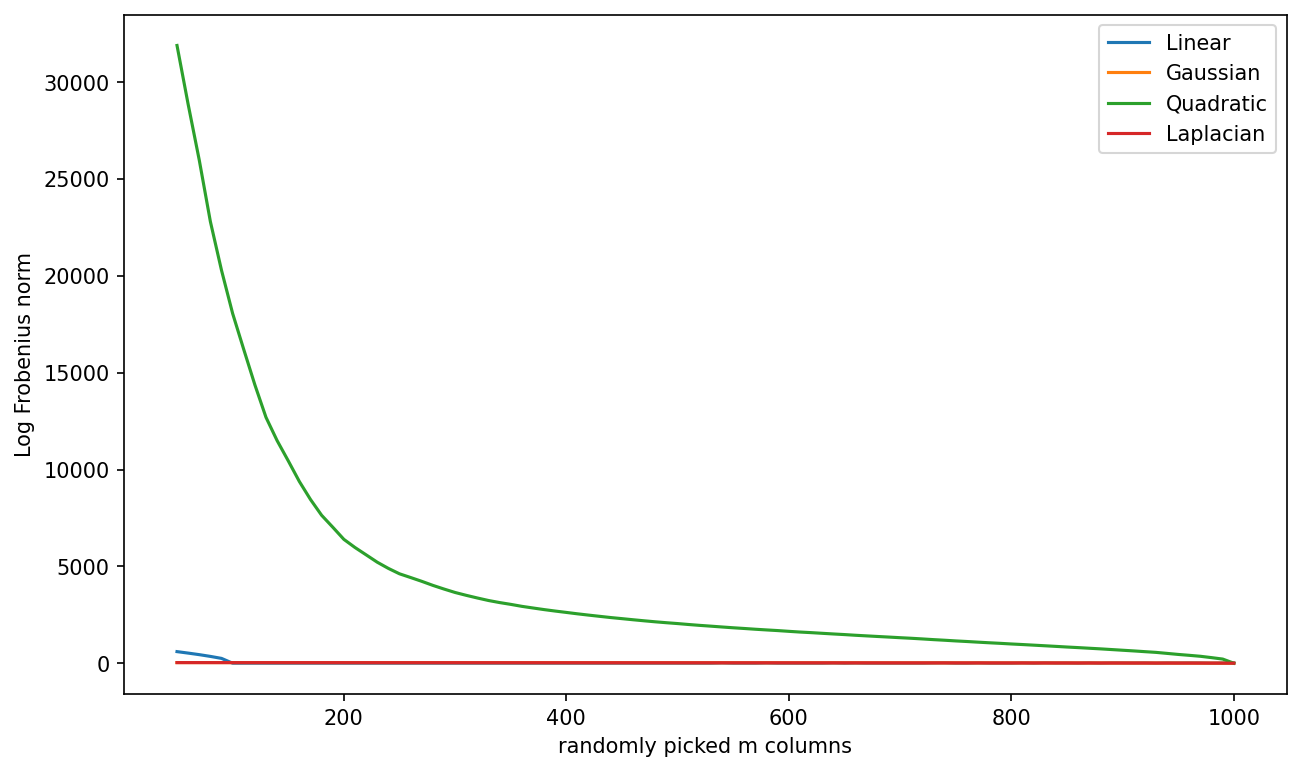

In [45]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,norm_lin,label = 'Linear')
plt.plot(x,norm_gauss,label = 'Gaussian')
plt.plot(x,norm_qua,label = 'Quadratic')
plt.plot(x,norm_lap,label = 'Laplacian')
plt.legend()
plt.xlabel('randomly picked m columns')
plt.ylabel('Log Frobenius norm')
plt.show()

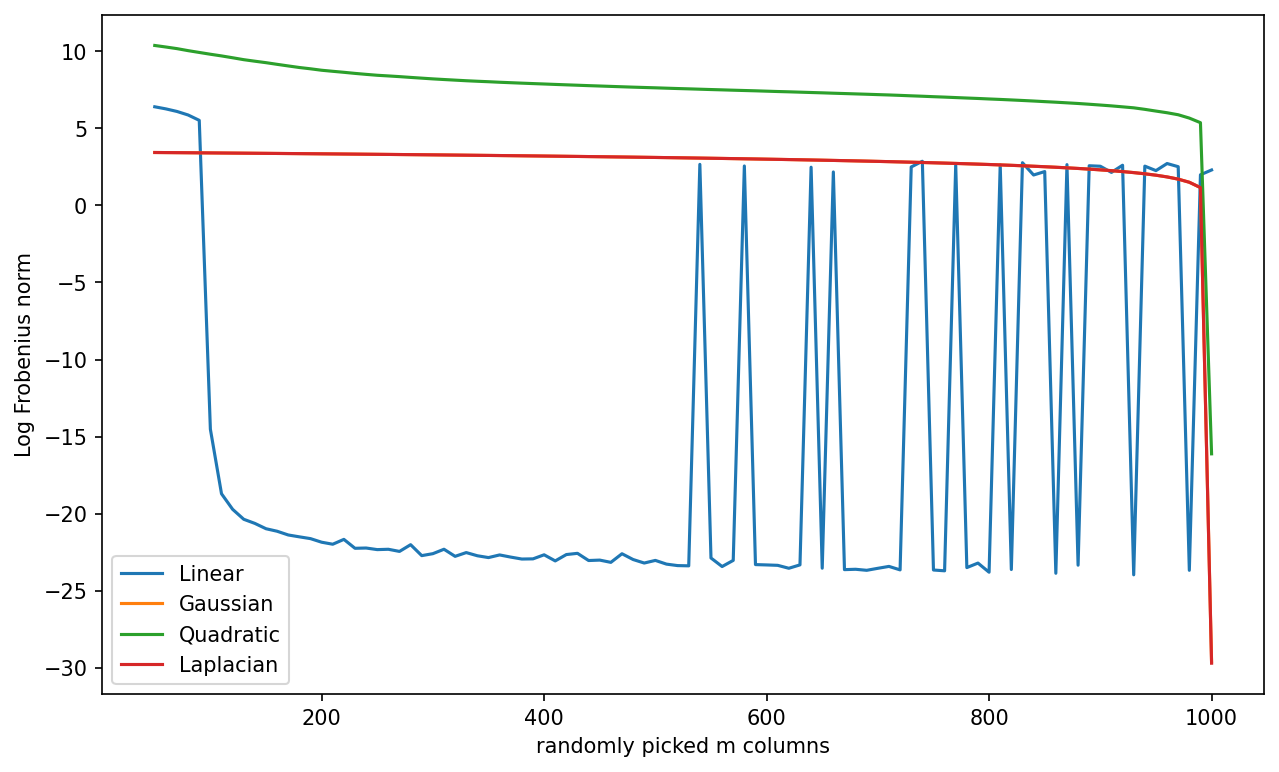

In [47]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.plot(x,np.log(norm_lin),label = 'Linear',lw = 2)
plt.plot(x,np.log(norm_gauss),label = 'Gaussian',lw = 2)
plt.plot(x,np.log(norm_qua),label = 'Quadratic',lw = 2)
plt.plot(x,np.log(norm_lap),label = 'Laplacian',lw = 2)
plt.legend()
plt.xlabel('randomly picked m columns')
plt.ylabel('Log Frobenius norm')
plt.show()

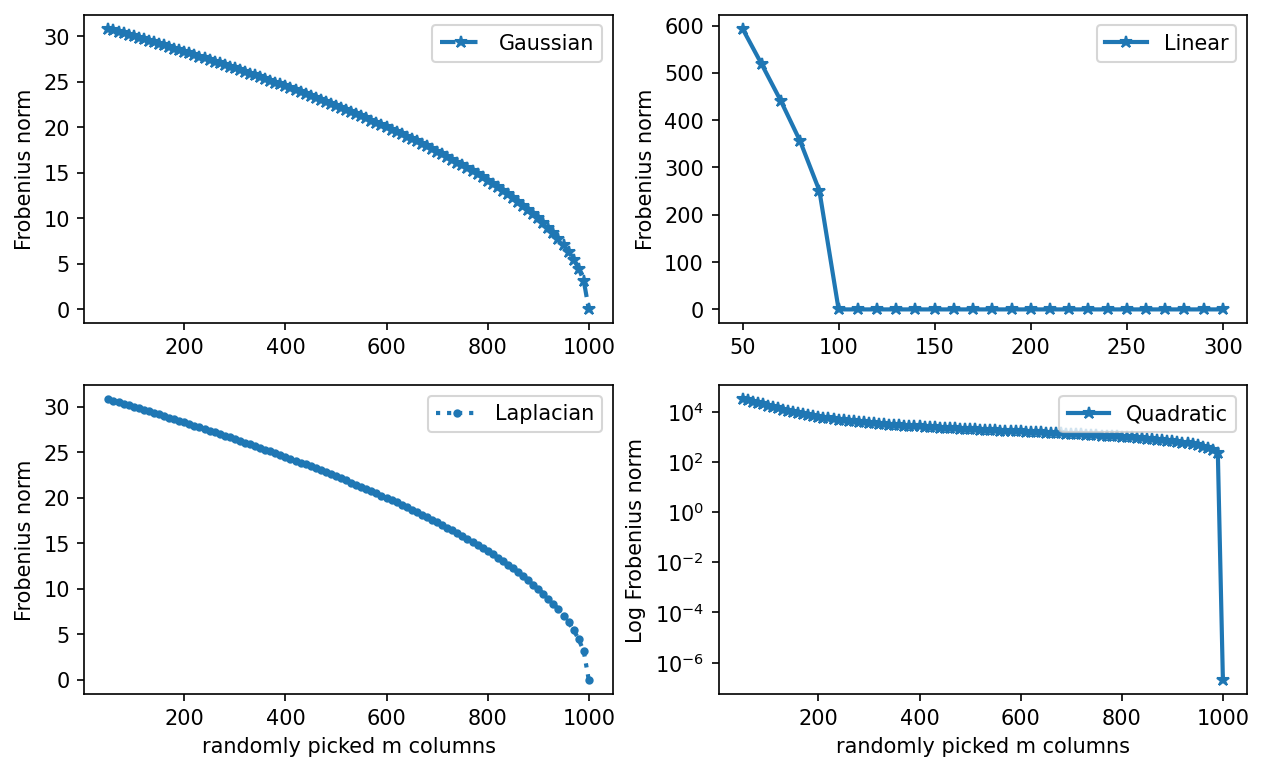

In [84]:
fig = plt.figure(figsize = (10,6),dpi=150)
plt.title('Nystroem: F-norm vs. picked columns m with different kernel methods')
plt.subplot(2,2,1)
plt.plot(x,norm_gauss,label = 'Gaussian',lw = 2,ls = '--',marker = '*')
plt.legend()
plt.ylabel('Frobenius norm')
plt.subplot(2,2,2)
plt.plot(x2,norm_lin,label = 'Linear',lw = 2,marker = '*')
plt.ylabel('Frobenius norm')
plt.legend()
plt.subplot(2,2,3)
plt.plot(x,norm_lap,label = 'Laplacian',lw =2,ls = ':',marker = '.')
plt.legend()
plt.xlabel('randomly picked m columns')
plt.ylabel('Frobenius norm')
plt.subplot(2,2,4)
plt.plot(x,norm_qua,label = 'Quadratic',lw = 2,marker = '*')
plt.legend()
plt.semilogy()
plt.xlabel('randomly picked m columns')
plt.ylabel('Log Frobenius norm')

plt.show()
fig.savefig('nystrom_fig2.png')